In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
np.set_printoptions(precision=4, linewidth=125)

## Generate test data

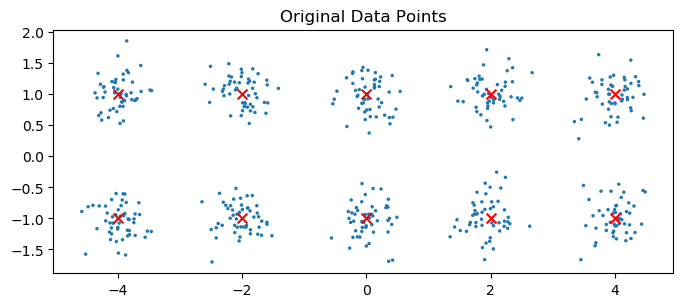

In [3]:
# Run this cell for 3 artificial clusters
N = 500
centers=np.array([
    [-4, 1], [-4,-1],
    [-2, 1], [-2,-1],
    [ 0, 1], [ 0,-1],
    [ 2, 1], [ 2,-1],
    [ 4, 1], [ 4,-1]
])
X, y_true = make_blobs(n_samples=N,
                  n_features=2,
                  centers=centers,
                  cluster_std=0.25, # increase the standard deviation for less well-separated clusters
                  center_box=(-3, 3),
                  shuffle=True)

# Plot 'em
fig = plt.figure(figsize=(8, 4), dpi=100)
ax = fig.add_subplot(1, 1, 1, aspect=1)
ax.scatter(X[:, 0], X[:, 1], marker='.', s=25, edgecolor='')
ax.scatter(centers[:,0], centers[:,1], marker='x', s=50, edgecolor='', c='red', linewidths=0)
ax.set_title('Original Data Points')
plt.show()

## Compare several clusterings using K=3

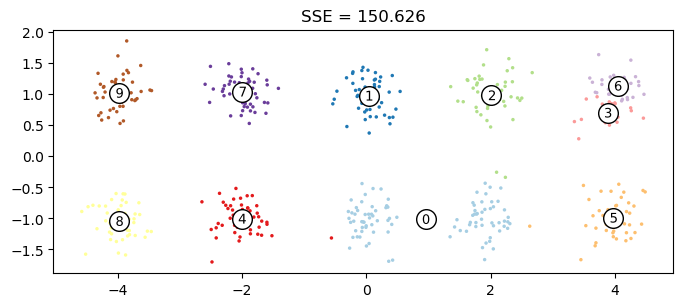

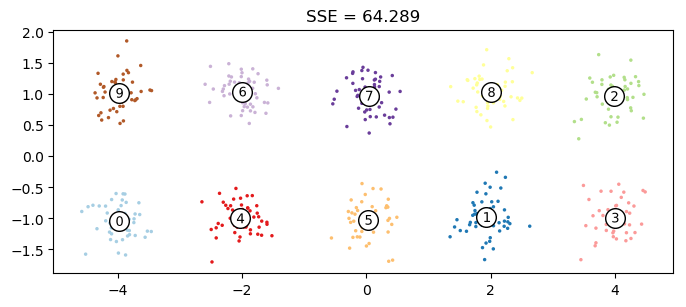

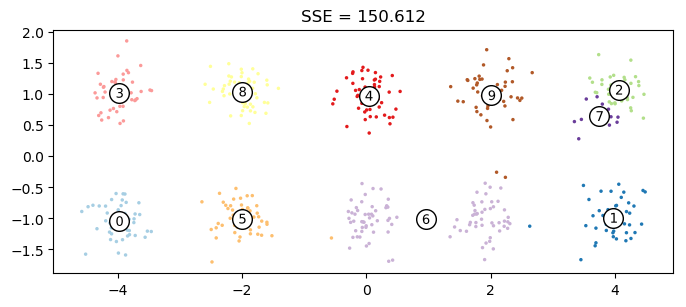

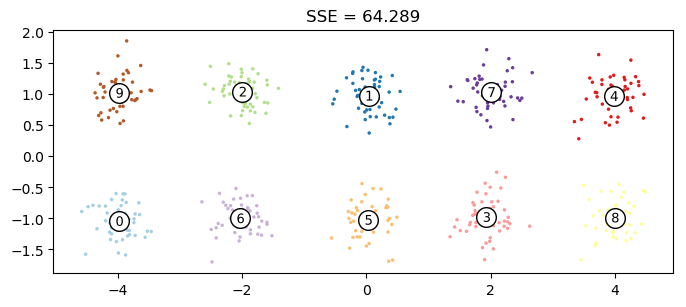

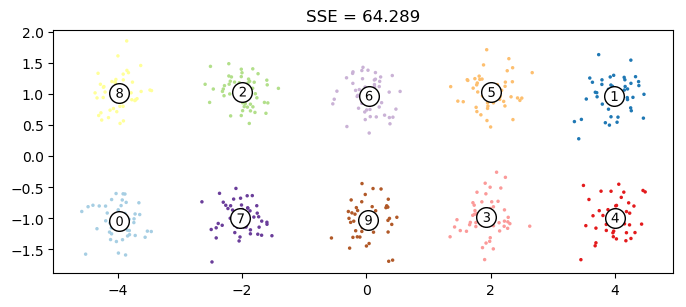

In [4]:
# Run Kmeans clustering with random initial centroids, then
# use SSE to choose the best clustering
for n in range(5):
    kmeans = KMeans(init='random', n_clusters=10)
    y = kmeans.fit_predict(X)
    SSE = kmeans.inertia_
    centers = kmeans.cluster_centers_
    
    # Plot 'em
    fig = plt.figure(figsize=(8, 4), dpi=100)
    ax = fig.add_subplot(1, 1, 1, aspect=1)
    ax.scatter(X[:, 0], X[:, 1], marker='.', s=25, edgecolor='', c=y, cmap='Paired')
    #ax.scatter(centers[:,0], centers[:,1], marker='x', s=50, edgecolor='', c='red', linewidths=0)
    ax.set_title('SSE = {:.3f}'.format(kmeans.inertia_))
    
    # Draw white circles at cluster centers
    ax.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')
    
    # Label the cluster centers
    for i, c in enumerate(centers):
        cl = '${}$'.format(i)
        ax.scatter(c[0], c[1], marker=cl, alpha=1, s=50, c='k', edgecolor='')

    plt.show()